In [ ]:
"""
FINAL PROJECT
"""

In [ ]:
#import data

In [1]:
import kagglehub

# Download selected version
path = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies/versions/410")

print("Path to dataset files:", path)

100%|██████████| 204M/204M [00:11<00:00, 18.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/versions/410


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet

df = pd.read_csv("TMDB_movie_dataset_v11.csv", on_bad_lines='skip')
df.head()



FileNotFoundError: [Errno 2] No such file or directory: 'TMDB_movie_dataset_v11.csv'

In [ ]:
for col in df.columns:
    print(col)

id
title
vote_average
vote_count
status
release_date
revenue
runtime
adult
backdrop_path
budget
homepage
imdb_id
original_language
original_title
overview
popularity
poster_path
tagline
genres
production_companies
production_countries
spoken_languages
keywords


In [ ]:
#clean data

In [ ]:
#drop unessesary columns
df.drop(columns=['backdrop_path', 'homepage', 'imdb_id', 'original_title', 'overview', 'poster_path', 'tagline', 'keywords', 'original_language', 'production_companies', 'production_countries', 'spoken_languages'], inplace=True)


In [ ]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,popularity,genres
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,83.952,"Action, Science Fiction, Adventure"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,140.241,"Adventure, Drama, Science Fiction"
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,130.643,"Drama, Action, Crime, Thriller"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,79.932,"Action, Adventure, Fantasy, Science Fiction"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,98.082,"Science Fiction, Action, Adventure"


In [ ]:
#drop nas/null

#print how many nulls each column has
print(f'Before dropping: \n{df.isnull().sum()}')

#drop nulls
df.dropna(inplace=True)

#print how many nulls each column has
print(f'\nAfter dropping: \n{df.isnull().sum()}')

Before dropping: 
id                   0
title               13
vote_average         0
vote_count           0
status               0
release_date    188830
revenue              0
runtime              0
adult                0
budget               0
popularity           0
genres          458138
dtype: int64

After dropping: 
id              0
title           0
vote_average    0
vote_count      0
status          0
release_date    0
revenue         0
runtime         0
adult           0
budget          0
popularity      0
genres          0
dtype: int64


In [ ]:
#onehot encoding for 'released' and 'status' columns
encoded_df = pd.get_dummies(df, columns=['status', 'adult'])

In [ ]:
encoded_df.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,genres,status_Canceled,status_In Production,status_Planned,status_Post Production,status_Released,status_Rumored,adult_False,adult_True
0,27205,Inception,8.364,34495,2010-07-15,825532764,148,160000000,83.952,"Action, Science Fiction, Adventure",False,False,False,False,True,False,True,False
1,157336,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,140.241,"Adventure, Drama, Science Fiction",False,False,False,False,True,False,True,False
2,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,130.643,"Drama, Action, Crime, Thriller",False,False,False,False,True,False,True,False
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000,79.932,"Action, Adventure, Fantasy, Science Fiction",False,False,False,False,True,False,True,False
4,24428,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,98.082,"Science Fiction, Action, Adventure",False,False,False,False,True,False,True,False


In [ ]:
#drop title and genres
encoded_df.drop(columns=['title', 'genres', 'release_date'], inplace=True)


In [ ]:
encoded_df.head()

,id,vote_average,vote_count,revenue,runtime,budget,popularity,status_Canceled,status_In Production,status_Planned,status_Post Production,status_Released,status_Rumored,adult_False,adult_True
0,27205,8.364,34495,825532764,148,160000000,83.952,False,False,False,False,True,False,True,False
1,157336,8.417,32571,701729206,169,165000000,140.241,False,False,False,False,True,False,True,False
2,155,8.512,30619,1004558444,152,185000000,130.643,False,False,False,False,True,False,True,False
3,19995,7.573,29815,2923706026,162,237000000,79.932,False,False,False,False,True,False,True,False
4,24428,7.710,29166,1518815515,143,220000000,98.082,False,False,False,False,True,False,True,False


In [ ]:
#heatmap

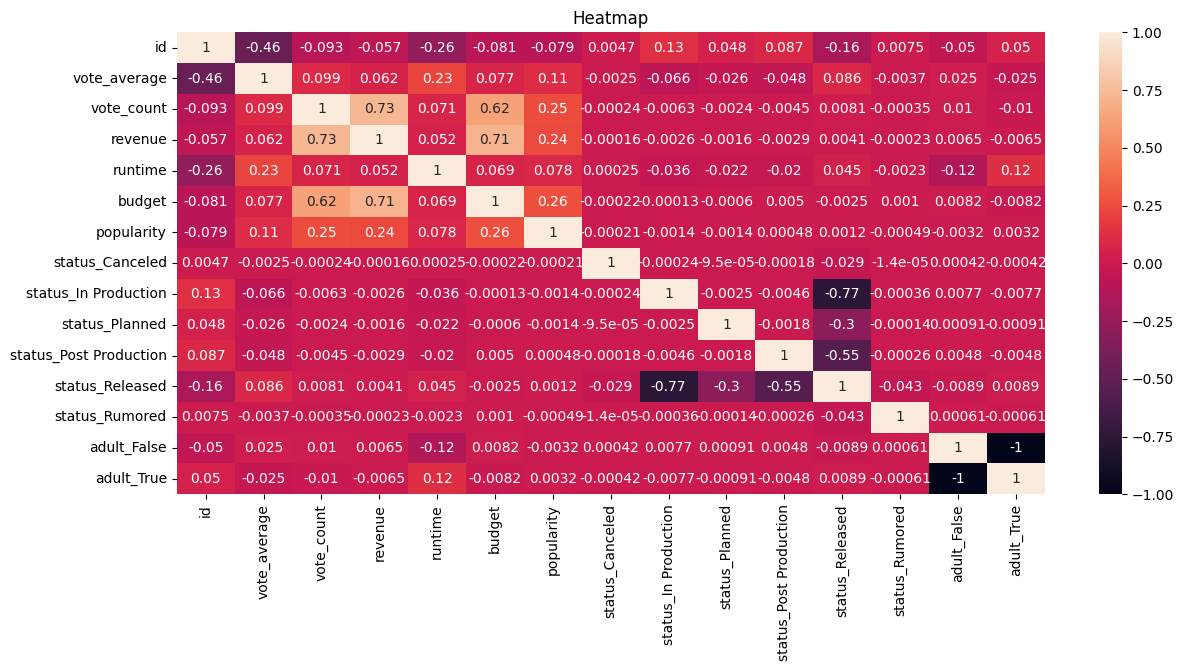

In [ ]:
plt.figure(figsize=(14, 6))
correlation = encoded_df.corr()
sns.heatmap(correlation, annot=True)
plt.title("Heatmap")
plt.show()

In [ ]:
#linear regression

Coefficients: [[4.16703953e-07]]
Intercept: [1.57815462]
Predicted y values: 
[[1.57815462]
 [1.57815462]
 [1.57815462]
 ...
 [1.57815462]
 [1.57815462]
 [1.57815462]]
Mean Squared Error: 73.84627189284775
R² Score: 0.07648218089551251


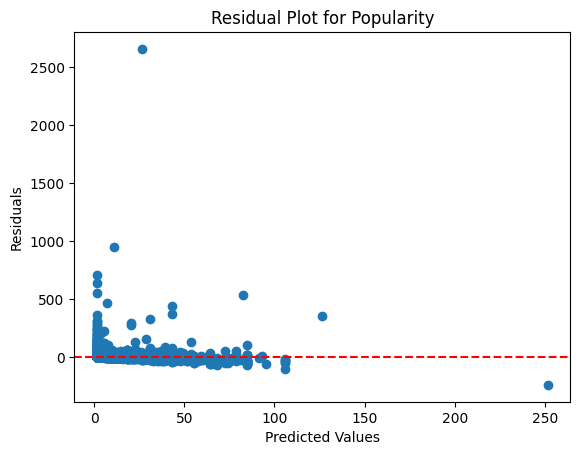

In [ ]:
#create test and train data for y = popularity
X = df[['budget']]
y = df[['popularity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

#regression
regression = LinearRegression()
regression.fit(X_train, y_train)
print(f'Coefficients: {regression.coef_}')
print(f'Intercept: {regression.intercept_}')

#y pred
y_pred = regression.predict(X_test)
print(f'Predicted y values: \n{y_pred}')

#show accuracy of predicted values
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Popularity")
plt.show()

#at first we tried to correlate these columns, but we realized that they were closely correlated

Coefficients: [2.57665754]
Intercept: 10841.977688546758
Predicted y values: 
[10841.97768855 10841.97768855 10841.97768855 ... 10841.97768855
 10841.97768855 10841.97768855]
Mean Squared Error: 254660176531191.66
R² Score: 0.48160761549073405


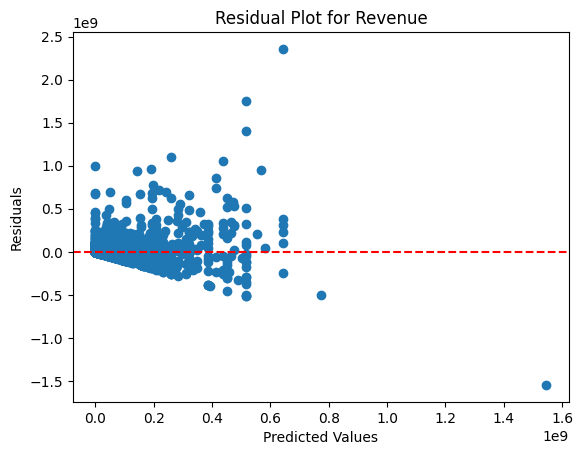

In [ ]:
#create test and train data for y = popularity
X = df[['budget']]
y = df['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

#regression
regression = LinearRegression()
regression.fit(X_train, y_train)
print(f'Coefficients: {regression.coef_}')
print(f'Intercept: {regression.intercept_}')

#y pred
y_pred = regression.predict(X_test)
print(f'Predicted y values: \n{y_pred}')

#show accuracy of predicted values
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Revenue")
plt.show()

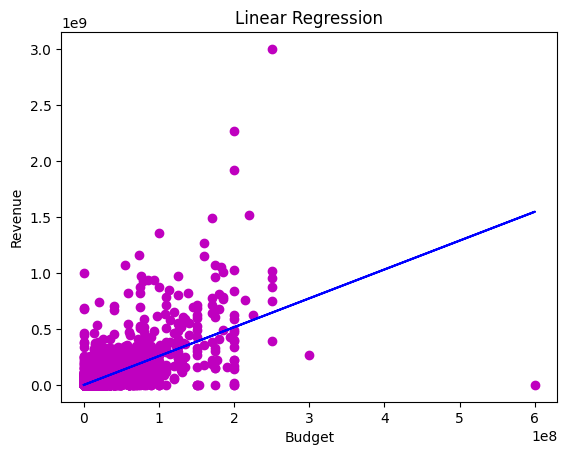

In [ ]:
# linear regression graph
plt.scatter(X_test, y_test, color = 'm')
plt.plot(X_test, y_pred, color='b')
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Linear Regression")
plt.show()

In [ ]:
#elastic net regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.646e+19, tolerance: 2.343e+16
  model = cd_fast.enet_coordinate_descent(


Elastic Net - Mean Squared Error: 254660176531193.62
Elastic Net - R² Score: 0.48160761549073006


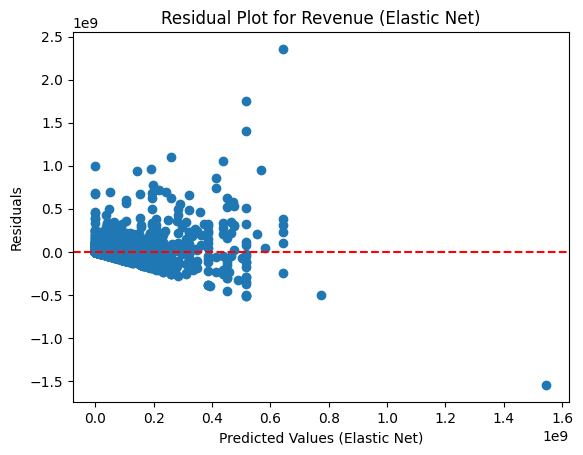

In [ ]:
# elastic net regression for budget and revenue

X = df[['budget']]
y_pop = df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y_pop, test_size=0.3, random_state=32)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

y_pred_en = elastic_net.predict(X_test)

# print the results
print("Elastic Net - Mean Squared Error:", mean_squared_error(y_test, y_pred_en))
print("Elastic Net - R² Score:", r2_score(y_test, y_pred_en))

# print the residual plot
residuals_en = y_test - y_pred_en
plt.scatter(y_pred_en, residuals_en)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (Elastic Net)")
plt.ylabel("Residuals")
plt.title("Residual Plot for Revenue (Elastic Net)")
plt.show()

In [ ]:
#bubble

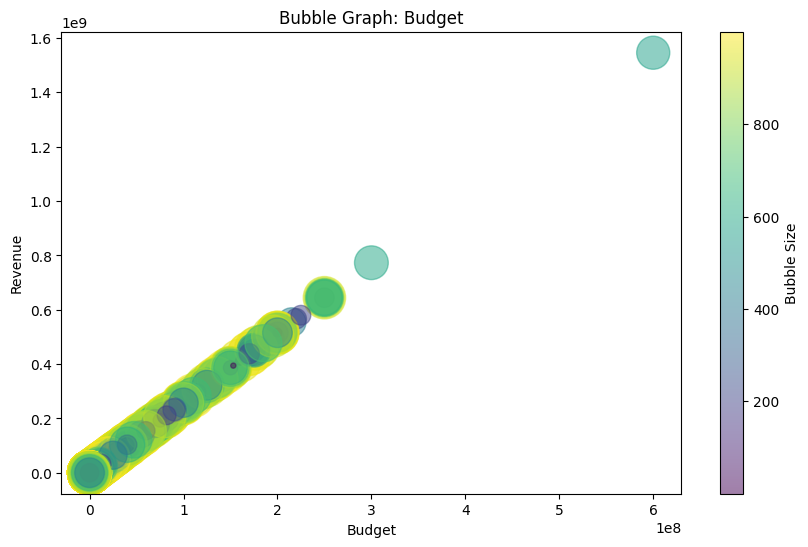

In [ ]:
# Create a bubble graph
plt.figure(figsize=(10, 6))
bubble_size = np.random.rand(len(X_test)) * 1000
plt.scatter(X_test, y_pred, s=bubble_size, alpha=0.5, c=bubble_size, cmap='viridis')


# Add labels and title
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Bubble Graph: Budget')
plt.colorbar(label='Bubble Size')
plt.show()